In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

### XOR data

In [2]:
x_seeds = np.array([(0,0), (1,0), (0,1), (1,1)], dtype=float)
y_seeds = np.array([0,1,1,0])

In [3]:
N = 1000
idxs = np.random.randint(0,4,N)

In [4]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [5]:
X += np.random.normal(scale = 0.25, size = X.shape)

### Plot data

In [6]:
idxs_1 = np.where(Y==1)
idxs_0 = np.where(Y==0)

In [7]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

In [8]:
X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

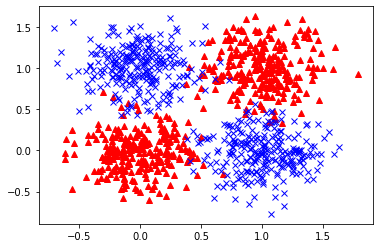

In [9]:
#plt.clf()
plt.plot(X_0[:,0], X_0[:,1], "r^")
plt.plot(X_1[:,0], X_1[:,1], "bx")
plt.show()

### Model

In [10]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size = (num_hiddens, num_input_features))
        self.b1 = np.random.normal(size = num_hiddens)
        self.W2 = np.random.normal(size = num_hiddens)
        self.b2 = np.random.normal(size = 1)
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2, a2)

In [11]:
model = shallow_neural_network(2,3)

### Train

In [12]:
def train(X, Y, model, lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a2, (z1, a1, z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
            
        diff = a2-y
        # layer 2
        # db2
        db2 += diff
        
        # dw2 : remove for-loops completed
        dW2 += a1*diff
        # layer 1
        # db1 : remove for-loops completed
        db1 += (1-a1**2)*model.W2*diff
        # db2 : remove for-loops completed
        dW1 += np.outer((1-a1**2)*model.W2*diff, x, out=None)

                
    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m
    
    return cost

In [13]:
for epoch in range(100):
    cost = train(X, Y, model, 1.0)
    if epoch%10 == 0:
        print(epoch, cost)

0 [1.03281889]
10 [0.63385191]
20 [0.58250232]
30 [0.52124711]
40 [0.44454968]
50 [0.36475299]
60 [0.3012723]
70 [0.2575284]
80 [0.2283814]
90 [0.20854492]


### Test

In [14]:
model.predict((1,1))[0].item()

0.10158278402077892

In [15]:
model.predict((1,0))[0].item()

0.9547431988179366

In [16]:
model.predict((0,1))[0].item()

0.9172140713972201

In [17]:
model.predict((0,0))[0].item()

0.03008781903594751